# Análise de Microdados do Enem

[Microdados do Enem no site do INEP](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import zipfile

with zipfile.ZipFile('microdados_enem_2019.zip') as z:
    print(*z.namelist(), sep="\n")

LEIA-ME E DOCUMENTOS TÉCNICOS/
LEIA-ME E DOCUMENTOS TÉCNICOS/matriz_referencia_enem.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/Leia_Me_Enem_2019.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/manual_de_redacao_do_enem_2019.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/Edital_enem_2019.pdf
PROVAS E GABARITOS/
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO_AMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO_SUPERAMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_03_DIA_1_BRANCO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_04_DIA_1_ROSA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_09_DIA_1_LARANJA_LEDOR.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_10_DIA_1_VERDE_LIBRAS.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_05_DIA_2_AMARELO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO.pdf.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO_AMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO_SUPERAMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_03_D

Considerando o tamanho da base de dados, vamos inicialmente carregar apenas os nomes das variáveis e escolher quais delas estarão no dataframe analisado.

In [3]:
with zipfile.ZipFile('microdados_enem_2019.zip') as z:
    with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as dados:
        dfcol = pd.read_csv(dados, sep=';', encoding='ISO-8859-1', nrows=0)

In [4]:
# Imprimir nomes das variáveis
dfcol.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [5]:
# Selecionar informações/variáveis considerando objetivos da análise 
colunas_selecionadas = ['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
                        'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA',
                        'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
                        'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
                        'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
                        'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'TP_PRESENCA_CN', 
                        'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'TP_STATUS_REDACAO',
                        'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 
                        'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',
                        'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q024', 'Q025']

### Dicionário de informações/variáveis selecionadas

**Dados do participante**

- NU_INSCRICAO:	Número de inscrição1 
- NU_ANO: Ano do Enem
- CO_MUNICIPIO_RESIDENCIA:	Código do município de residência 
	- 1º dígito: Região
	- 1º e 2º dígitos: UF
	- 3º, 4º, 5º e 6º dígitos: Município
	- 7º dígito: dígito verificador
- NO_MUNICIPIO_RESIDENCIA:	Nome do município de residência
- SG_UF_RESIDENCIA:	Sigla da Unidade da Federação de residência
- NU_IDADE:	Idade
- TP_SEXO:	Sexo
- TP_COR_RACA:	Cor/raça

- TP_ST_CONCLUSAO: Situação de conclusão do Ensino Médio
- TP_ANO_CONCLUIU: Ano de Conclusão do Ensino Médio
- TP_ESCOLA: Tipo de escola do Ensino Médio
- TP_ENSINO: Tipo de instituição que concluiu ou concluirá o Ensino Médio 

**Dados da escola**
- CO_ESCOLA	Código da Escola4
- CO_MUNICIPIO_ESC
	- Código do município da escola 
	- 1º dígito: Região
	- 1º e 2º dígitos: UF
	- 3º, 4º, 5º e 6º dígitos: Município
	- 7º dígito: dígito verificador
- NO_MUNICIPIO_ESC	Nome do município da escola
- CO_UF_ESC	Código da Unidade da Federação da escola
- SG_UF_ESC	Sigla da Unidade da Federação da escola
- TP_DEPENDENCIA_ADM_ESC	Dependência administrativa (Escola)
    - 1	Federal
    - 2	Estadual
    - 3	Municipal
    - 4	Privada
- TP_LOCALIZACAO_ESC	Localização (Escola)
    - 1 = urbana
    - 2 = rural
- TP_SIT_FUNC_ESC	Situação de funcionamento (Escola)


**Dados da prova objetiva e da redação**

- NU_NOTA_CN:	Nota da prova de Ciências da Natureza
- NU_NOTA_CH:	Nota da prova de Ciências Humanas
- NU_NOTA_LC:	Nota da prova de Linguagens e Códigos
- NU_NOTA_MT:	Nota da prova de Matemática

- NU_NOTA_REDACAO:	Nota da prova de redação

**Dados do Questionário Socioeconômico**

- Q001:	Até que série seu pai, ou o homem responsável por você, estudou?
- Q002: Até que série sua mãe, ou a mulher responsável por você, estudou?
- Q003:	... ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você.
- Q004:	... ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você.
- Q005:	Incluindo você, quantas pessoas moram atualmente em sua residência?
- Q006:	Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
- Q024:	Na sua residência tem computador?
- Q025:	Na sua residência tem acesso à Internet?

Criar um dataframe com os vriáveis selecionadas

In [6]:
with zipfile.ZipFile('microdados_enem_2019.zip') as z:
    with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as dados:
        df = pd.read_csv(dados, sep=';', encoding='ISO-8859-1', usecols= colunas_selecionadas)

In [7]:
# Visualizar dados (5 primeiras linhas)
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,...,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q024,Q025
0,190001004627,2019,1506807,Santarém,PA,21,M,3,1,3,...,1.0,780.0,D,E,A,A,7,B,B,A
1,190001004628,2019,1504059,Mãe do Rio,PA,16,F,3,3,0,...,1.0,600.0,D,E,A,A,5,B,A,A
2,190001004629,2019,1505502,Paragominas,PA,18,F,1,2,0,...,1.0,640.0,H,E,A,D,3,C,C,B
3,190001004630,2019,1507706,São Sebastião da Boa Vista,PA,23,M,3,2,0,...,NaN,NaN,D,D,A,B,3,C,A,A
4,190001004631,2019,1503903,Juruti,PA,23,M,3,1,5,...,NaN,NaN,B,C,A,A,5,C,A,A


In [8]:
# Dimensão do dataframe
df.shape

(5095270, 42)

In [9]:
# Informações básicas do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Data columns (total 42 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   NU_INSCRICAO             int64  
 1   NU_ANO                   int64  
 2   CO_MUNICIPIO_RESIDENCIA  int64  
 3   NO_MUNICIPIO_RESIDENCIA  object 
 4   SG_UF_RESIDENCIA         object 
 5   NU_IDADE                 int64  
 6   TP_SEXO                  object 
 7   TP_COR_RACA              int64  
 8   TP_ST_CONCLUSAO          int64  
 9   TP_ANO_CONCLUIU          int64  
 10  TP_ESCOLA                int64  
 11  TP_ENSINO                float64
 12  CO_ESCOLA                float64
 13  CO_MUNICIPIO_ESC         float64
 14  NO_MUNICIPIO_ESC         object 
 15  CO_UF_ESC                float64
 16  SG_UF_ESC                object 
 17  TP_DEPENDENCIA_ADM_ESC   float64
 18  TP_LOCALIZACAO_ESC       float64
 19  TP_SIT_FUNC_ESC          float64
 20  TP_PRESENCA_CN           int64  
 21  TP_PRESE

Renomear variáveis para facilitar a análise.

In [10]:
# renomear variáveis
df.rename(columns={'SG_UF_RESIDENCIA':'uf_resid',
                   'NU_IDADE':'idade',
                   'TP_SEXO':'sexo',
                   'TP_COR_RACA':'cor',
                   'TP_ANO_CONCLUIU':'ano_conclusao',
                   'TP_DEPENDENCIA_ADM_ESC':'dep_escola',
                   'NU_NOTA_CN':'nota_cnatureza',
                   'NU_NOTA_CH':'nota_chumanas',
                   'NU_NOTA_LC':'nota_linguagens',
                   'NU_NOTA_MT':'nota_matematica',
                   'NU_NOTA_REDACAO':'nota_redacao',
                   'Q001':'escol_pai',
                   'Q002':'escol_mae',
                   'Q003':'ocup_pai',
                   'Q004':'ocup_mae',
                   'Q005':'npessoas_resid',
                   'Q006':'renda_familiar',
                   'Q024':'computador',
                   'Q025':'internet'}, inplace=True)

### Análise do desempenho por sexo

In [11]:
# Filtrar sexo e nota da redação
sexo_redacao = df.filter(items = ['sexo', 'nota_redacao'])
sexo_redacao.head()

,sexo,nota_redacao
0,M,780.0
1,F,600.0
2,F,640.0
3,M,NaN
4,M,NaN


In [12]:
# Excluir dados faltantes
sexo_redacao = sexo_redacao.dropna()
sexo_redacao.head()

,sexo,nota_redacao
0,M,780.0
1,F,600.0
2,F,640.0
5,M,580.0
6,F,360.0


In [13]:
# Contar número de observações por sexo
sexo_redacao['sexo'].value_counts()

F    2336431
M    1586713
Name: sexo, dtype: int64

In [14]:
# proporções
sexo_redacao['sexo'].value_counts(normalize = True) * 100

F    59.555066
M    40.444934
Name: sexo, dtype: float64

In [15]:
# Nota média por sexo
sexo_redacao.groupby('sexo').mean()

,nota_redacao
sexo,
F,577.159368
M,562.396035


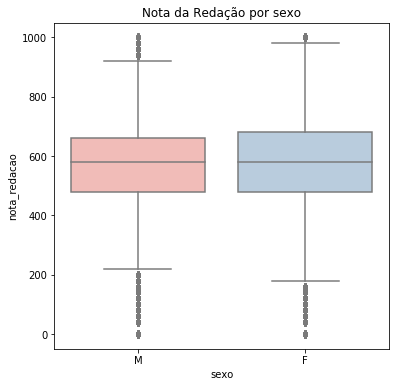

In [16]:
plt.figure(figsize = [6, 6])
sns.boxplot(data = sexo_redacao, x='sexo', y='nota_redacao', palette="Pastel1")
plt.title('Nota da Redação por sexo');

In [17]:
df_m, df_f = sexo_redacao.loc[sexo_redacao['sexo']=='M'],   sexo_redacao.loc[sexo_redacao['sexo']=='F']

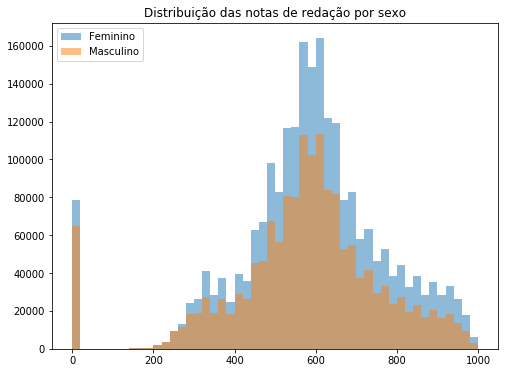

In [18]:
plt.figure(figsize=(8,6))
plt.hist(df_f['nota_redacao'], bins=50, alpha = 0.5, label='Feminino')
plt.hist(df_m['nota_redacao'], bins=50, alpha = 0.5, label='Masculino')
plt.legend(loc='upper left')
plt.title('Distribuição das notas de redação por sexo');